## Evaluation of the Stresser Model

In [18]:
import pandas as pd
import json
import numpy as np
import altair as alt
alt.renderers.enable('default')
#alt.renderers.enable('notebook')

RendererRegistry.enable('default')

#### Distribution of words in full data set

In [19]:
full = json.load(open("./data/stresses.json", "r"))
print(len(full))

26308


One-syll words in full dataset: 2590
Two-syll words in full dataset: 9063
Three-syll words in full dataset: 8963
Four-syll words in full dataset: 4218
Five-syll words in full dataset: 1340
Six-syll words in full dataset: 133
Seven-syll words in full dataset: 1


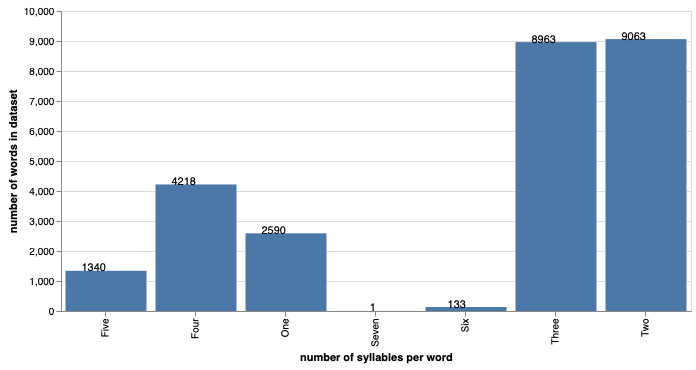

In [20]:
syllabified_words = []
number_of_sylls = []

for d in full.values():
    syllabified_words.append(d['syllabified'])

for item in syllabified_words:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    number_of_sylls.append(cnt)

#print(syllabified_words)
#print(number_of_sylls)

print('One-syll words in full dataset:', number_of_sylls.count(1))
print('Two-syll words in full dataset:', number_of_sylls.count(2))
print('Three-syll words in full dataset:', number_of_sylls.count(3))
print('Four-syll words in full dataset:', number_of_sylls.count(4))
print('Five-syll words in full dataset:', number_of_sylls.count(5))
print('Six-syll words in full dataset:', number_of_sylls.count(6))
print('Seven-syll words in full dataset:', number_of_sylls.count(7))


source = pd.DataFrame({
    'number of syllables per word': ['Seven', 'Six', 'Five', 'Four', 'Three', 'Two', 'One'],
    'number of words in dataset': [number_of_sylls.count(7), number_of_sylls.count(6), number_of_sylls.count(5),
          number_of_sylls.count(4), number_of_sylls.count(3), number_of_sylls.count(2), number_of_sylls.count(1)]
})

chart = alt.Chart(source).mark_bar().encode(
    x='number of syllables per word',
    y='number of words in dataset')

text = chart.mark_text(
    align='right'
).encode(
    text='number of words in dataset'
)

chart + text

#### Loading gold and silver datasets for evaluation

In [21]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold = [value["syllabified"] for value in gold]
items_silver = [value["syllabified"] for value in silver]

#### Convert to dataframes

In [22]:
df_gold = pd.DataFrame(value["syllabified"] for value in gold)
df_gold = df_gold.rename(index=str, columns={0: "gold_syllabification"})
#print(df_gold.head())
print('Total number of words in gold:', len(df_gold))

df_silver = pd.DataFrame(value["syllabified"] for value in silver)
df_silver = df_silver.rename(index=str, columns={0: "silver_syllabification"})
#print(df_silver.head())
print('Total number of words in silver:', len(df_silver))

Total number of words in gold: 2631
Total number of words in silver: 2631


#### General comparison between gold and silver dataframes

In [23]:
diff_keys = set(items_silver) ^ set(items_gold)
print('Mistakes are made against the syllabification these words:', diff_keys)

Mistakes are made against the syllabification these words: {'lot-ha-re', 'paesch-lam', 'ghe-dyen', 'car-na-c-ioen', 'be-au-voy-sijs', 'erf-ach-tic-he-den', 've-r-ent', 'en-vi-en', 'tau-re-li-a-ne', 'ta-be-l-ioe-ne', 'tau-rel-ia-ne', 'per-sien', 'pa-leste-ne', 'geu-lo-gen', 'oc-tou-iaen', 'ont-ee-ren', 'montjou-we', 'mont-jou-we', 'trans-fi-gu-reer-de', 'hys-to-rie', 'paer-ti-en', 'be-ne-di-chin-ge', 'af-ri-den', 'e-thio-pi-a', 'er-f-ach-tic-he-den', 'paer-tien', 'be-geer-lijc-he-de', 'on-we-tend-he-de', 'toon-en', 'on-we-ten-dhe-de', 'en-vien', 'ghe-l-re-lant', 'be-u-re-de', 'on-tee-ren', 'per-si-en', 'vis-ioe-ne', 'u-trecht', 'pel-ioen', 'ri-en', 'son-der-lijche-den', 'ri-xi-o-naer', 'erach-tic-he-den', 'e-phe-sen', 'vo-luc-iaen', 'on-ter-ven', 'zoee', 'too-nen', 'pae-sch-lam', 'ge-lac-hiert', 'e-ma-nuel', 'prai-eel', 'me-o-ti-des', 'a-co-le-yen', 'xxxix', 'euf-ra-te', 'er-mi-o-na', 'ze-ghef-rijt', 'bei-er-lant', 'arm-bors-ten', 'fre-ne-sien', 'pa-les-te-ne', 'du-uel-heit', 'beau-voy-

In [24]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

value_counts = (result.gold_syllabification == result.silver_syllabification).value_counts()
print(value_counts)

True     2540
False      91
dtype: int64


#### Print dataframe with mistakes

In [25]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

true_false = result.set_index('correct?')
mistakes = true_false.loc[False]
mistakes

,gold_syllabification,silver_syllabification
correct?,,
False,erf-ach-tic-he-den,er-f-ach-tic-he-den
False,ver-sma-den,ver-s-ma-den
False,pel-ioen,pe-lioen
False,vau-cle-re,vauc-le-re
False,ve-rent,ve-r-ent
False,arm-bor-sten,arm-bors-ten
False,ve-dre,ved-re
False,rix-io-naer,ri-xi-o-naer
False,e-thi-o-pi-a,e-thio-pi-a


#### Expand dataframe with information about syllable counts

In [26]:
num_sylls_gold = []
num_sylls_silver = []


for item in items_gold:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_gold.append(cnt)


for item in items_silver:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_silver.append(cnt)
    
# Make df's

df_gold_syll_count = pd.DataFrame(num_sylls_gold)
df_gold_syll_count = df_gold_syll_count.rename(index=str, columns={0: "num_sylls_gold"})

df_silver_syll_count = pd.DataFrame(num_sylls_silver)
df_silver_syll_count = df_silver_syll_count.rename(index=str, columns={0: "num_sylls_silver"})

result_sylls = pd.concat([df_gold_syll_count, df_gold, df_silver_syll_count, df_silver], axis=1)

result_sylls['correct?'] = (df_gold_syll_count['num_sylls_gold'] == df_silver_syll_count['num_sylls_silver'])

x = result_sylls.set_index('correct?')
mistakes_number_of_sylls = x.loc[False]
mistakes_number_of_sylls
#print(mistakes_number_of_sylls)
print('Incorrect predictions about the number of syllables in a word:', len(mistakes_number_of_sylls), '(out of a total of', len(items_gold), 'words).')

Incorrect predictions about the number of syllables in a word: 57 (out of a total of 2631 words).


#### Calculate accuracy for mono- and polysyllable words

In [27]:
cnt_1syllable_words = 0
cnt_2syllable_words = 0
cnt_3syllable_words = 0
cnt_4syllable_words = 0
cnt_5syllable_words = 0
cnt_6syllable_words = 0
cnt_7syllable_words = 0


for item in items_gold:
    num_syl_word = item.split("-")
    if len(num_syl_word) == 1:
        cnt_1syllable_words += 1
    elif len(num_syl_word) == 2:
        cnt_2syllable_words += 1
    elif len(num_syl_word) == 3:
        cnt_3syllable_words += 1
    elif len(num_syl_word) == 4:
        cnt_4syllable_words += 1
    elif len(num_syl_word) == 5:
        cnt_5syllable_words += 1
    elif len(num_syl_word) == 6:
        cnt_6syllable_words += 1
    elif len(num_syl_word) == 7:
        cnt_7syllable_words += 1
        

cnt_1syllable_words_mistakes = 0
cnt_2syllable_words_mistakes = 0
cnt_3syllable_words_mistakes = 0
cnt_4syllable_words_mistakes = 0
cnt_5syllable_words_mistakes = 0
cnt_6syllable_words_mistakes = 0
cnt_7syllable_words_mistakes = 0


if len(num_sylls_gold) == len(num_sylls_silver):
    for i in range(len(num_sylls_gold)):
        if num_sylls_gold[i] == 1 and num_sylls_silver[i] != 1:
            cnt_1syllable_words_mistakes += 1
        if num_sylls_gold[i] == 2 and num_sylls_silver[i] != 2:
            cnt_2syllable_words_mistakes += 1
        if num_sylls_gold[i] == 3 and num_sylls_silver[i] != 3:
            cnt_3syllable_words_mistakes += 1
        if num_sylls_gold[i] == 4 and num_sylls_silver[i] != 4:
            cnt_4syllable_words_mistakes += 1
        if num_sylls_gold[i] == 5 and num_sylls_silver[i] != 5:
            cnt_5syllable_words_mistakes += 1
        if num_sylls_gold[i] == 6 and num_sylls_silver[i] != 6:
            cnt_6syllable_words_mistakes += 1
        if num_sylls_gold[i] == 7 and num_sylls_silver[i] != 7:
            cnt_7syllable_words_mistakes += 1

print('Total number of 1syllabic words:', cnt_1syllable_words, 'Mistakes:', cnt_1syllable_words_mistakes)
print('Total number of 2syllabic words:', cnt_2syllable_words, 'Mistakes:', cnt_2syllable_words_mistakes)
print('Total number of 3syllabic words:', cnt_3syllable_words, 'Mistakes:', cnt_3syllable_words_mistakes)
print('Total number of 4syllabic words:', cnt_4syllable_words, 'Mistakes:', cnt_4syllable_words_mistakes)
print('Total number of 5syllabic words:', cnt_5syllable_words, 'Mistakes:', cnt_5syllable_words_mistakes)
print('Total number of 6syllabic words:', cnt_6syllable_words, 'Mistakes:', cnt_6syllable_words_mistakes)
print('Total number of 7syllabic words:', cnt_7syllable_words, 'Mistakes:', cnt_7syllable_words_mistakes)    

try:
            
    print('Accuracy syllabification of one-syllable words:', float(100-cnt_1syllable_words_mistakes/cnt_1syllable_words))
    print('Accuracy syllabification of two-syllable words:', float(100-cnt_2syllable_words_mistakes/cnt_2syllable_words))
    print('Accuracy syllabification of three-syllable words:', float(100-cnt_3syllable_words_mistakes/cnt_3syllable_words))
    print('Accuracy syllabification of four-syllable words:', float(100-cnt_4syllable_words_mistakes/cnt_4syllable_words))
    print('Accuracy syllabification of five-syllable words:', float(100-cnt_5syllable_words_mistakes/cnt_5syllable_words))
    print('Accuracy syllabification of six-syllable words:', float(100-cnt_6syllable_words_mistakes/cnt_6syllable_words))
    print('Accuracy syllabification of seven-syllable words:', float(100-cnt_7syllable_words_mistakes/cnt_7syllable_words))

except ZeroDivisionError:
    print("You can't divide by zero!")

Total number of 1syllabic words: 219 Mistakes: 2
Total number of 2syllabic words: 943 Mistakes: 12
Total number of 3syllabic words: 936 Mistakes: 25
Total number of 4syllabic words: 399 Mistakes: 12
Total number of 5syllabic words: 121 Mistakes: 6
Total number of 6syllabic words: 13 Mistakes: 0
Total number of 7syllabic words: 0 Mistakes: 0
Accuracy syllabification of one-syllable words: 99.99086757990868
Accuracy syllabification of two-syllable words: 99.98727465535525
Accuracy syllabification of three-syllable words: 99.9732905982906
Accuracy syllabification of four-syllable words: 99.96992481203007
Accuracy syllabification of five-syllable words: 99.9504132231405
Accuracy syllabification of six-syllable words: 100.0
You can't divide by zero!


#### Analysis of stress pattern predictions

In [28]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold_human_annotation = [value["human_annotation"] for value in gold]
items_gold_corrected_stress = [value["corrected_stress"] for value in gold]
items_gold_patterns = [value["stress_idx"] for value in gold]

items_silver_predictions = [value["human_annotation"] for value in silver]

print(len(items_gold_human_annotation))
print(len(items_gold_corrected_stress))
print(len(items_gold_patterns))
print(len(items_silver_predictions))


gold_predictions = []
silver_predictions = []

for item1, item2, item3 in zip(items_gold_human_annotation, items_gold_corrected_stress, items_gold_patterns):
    if item1 is not None:
        gold_predictions.append(item1)
    elif item2 is not None:
        gold_predictions.append(item2)
    else:
        gold_predictions.append(item3) 

for item in items_silver_predictions:
    if len(item) == 1:
        silver_predictions.append(item)
    else:
        silver_predictions.append([item])

    
print('Total number of gold stress patterns:', len(gold_predictions))
print('Total number of silver stress patterns:', len(silver_predictions))

# Make df's

df_gold_stress = pd.DataFrame(gold_predictions)
df_gold_stress = df_gold_stress.rename(index=str, columns={0: "gold_stress"})

df_silver_stress = pd.DataFrame(silver_predictions)
df_silver_stress = df_silver_stress.rename(index=str, columns={0: "silver_stress"})

result_stress = pd.concat([df_gold_stress, df_gold, df_silver_stress, df_silver], axis=1)

result_stress['correct?'] = (df_gold_stress['gold_stress'] == df_silver_stress['silver_stress'])

x = result_stress.set_index('correct?')
x
mistakes_stress = x.loc[False]
mistakes_stress

2631
2631
2631
2631
Total number of gold stress patterns: 2631
Total number of silver stress patterns: 2631


,gold_stress,gold_syllabification,silver_stress,silver_syllabification
correct?,,,,
False,-2,ni-che-a,[],ni-che-a
False,-2,y-za-yas,"[-2, -1]",y-za-yas
False,"[-3, -1]",er-me-rie,"[-2, -1]",er-me-rie
False,"[-4, -2]",erf-ach-tic-he-den,"[-5, -4, -2]",er-f-ach-tic-he-den
False,-2,ver-sma-den,"[-3, -2]",ver-s-ma-den
False,-1,wy-gant,-2,wy-gant
False,-1,pel-ioen,-2,pe-lioen
False,"[-4, -2]",cam-per-co-ran-tijn,"[-4, -1]",cam-per-co-ran-tijn
False,-2,tor-nier-spel,-3,tor-nier-spel


In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(gold_predictions, silver_predictions)

ValueError: unknown is not supported